# Defining the Question

### a) Specifying the Question

Predict the store sales for each store in the test set for the next two months.

### b) Defining the Metric for Success

This project will be considered successful if we are able to predict the store sales for each store in the test set for the next two months.

### c) Understanding the context 

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Data Dictionary

ID- Unique Identifier for a row

Store_id- Unique id for each Store

Store_Type- Type of the Store

Location_Type- Type of the location where Store is located

Region_Code- Code of the Region where Store is located

Date- Information about the Date

Holiday- If there is holiday on the given Date, 1 : Yes, 0 : No

Discount- If discount is offered by store on the given Date, Yes/ No

Orders- Number of Orders received by the Store on the given Day

Sales- Total Sale for the Store on the given Day

For more info on the data and problem statement, visit https://datahack.analyticsvidhya.com/contest/job-a-thon-september-2021/#ProblemStatement 


### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [3]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

### Loading and Previewing our Dataset

In [4]:
# Loading the Dataset from the source i.e. csv
df_train = pd.read_csv('/content/TRAIN (1).csv')
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
# Loading the Dataset from the source i.e. csv
# We are missing the #order and sales columns in the test data set
df_test = pd.read_csv('/content/TEST_FINAL.csv')
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
# Loading the Dataset from the source i.e. csv
# We are missing the #order and sales columns in the test data set
df_sub = pd.read_csv('/content/SAMPLE.csv')
df_sub.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


## Checking the Data

In [7]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df_train.shape[0]) + ' rows, and ' + str(df_train.shape[1]) + ' columns')

This train dataset has 127021 rows, and 10 columns


In [8]:
# Determining the no. of records in our test dataset
# We are missing the Is_Lead column in the test data set
print('This test dataset has ' + str(df_test.shape[0]) + ' rows, and ' + str(df_test.shape[1]) + ' columns')

This test dataset has 22265 rows, and 8 columns


In [9]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [10]:
# checking the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127021 entries, 0 to 127020
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             127021 non-null  object 
 1   Store_id       127021 non-null  int64  
 2   Store_Type     127021 non-null  object 
 3   Location_Type  127021 non-null  object 
 4   Region_Code    127021 non-null  object 
 5   Date           127021 non-null  object 
 6   Holiday        127021 non-null  int64  
 7   Discount       127021 non-null  object 
 8   #Order         127021 non-null  int64  
 9   Sales          127021 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 9.7+ MB


In [11]:
# let us see the columns in our dataframe
print("***** Column names present in dataset *****")
df_train.columns

***** Column names present in dataset *****


Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [12]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_train, title="WOMart Sales Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features
for i in df_train.columns:
    print("Number of unique {} are : {}".format(i,len(df_train[i].unique())))

Number of unique ID are : 127021
Number of unique Store_id are : 365
Number of unique Store_Type are : 4
Number of unique Location_Type are : 5
Number of unique Region_Code are : 4
Number of unique Date are : 349
Number of unique Holiday are : 2
Number of unique Discount are : 2
Number of unique #Order are : 271
Number of unique Sales are : 37937


# Data Cleaning-Train Dataset

In [14]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df_train.copy(deep = True)

In [15]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date',
       'holiday', 'discount', '#order', 'sales'],
      dtype='object')

In [16]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [17]:
# Let Us Drop the columns that do contribute to sales

df_copy.drop(['id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [18]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have missing values in our dataset

store_id :  0
store_type :  0
location_type :  0
region_code :  0
date :  0
holiday :  0
discount :  0
#order :  0
sales :  0


In [19]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframes

Shape of dataframe with no missing values:  (127021, 9)
Shape of dataframe with missing values:  (127021, 9)


### Separate the date column

In [20]:
# first let us convert the date column to an appropriate data type
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.info()
# success

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127021 entries, 0 to 127020
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       127021 non-null  int64         
 1   store_type     127021 non-null  object        
 2   location_type  127021 non-null  object        
 3   region_code    127021 non-null  object        
 4   date           127021 non-null  datetime64[ns]
 5   holiday        127021 non-null  int64         
 6   discount       127021 non-null  object        
 7   #order         127021 non-null  int64         
 8   sales          127021 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 9.7+ MB


In [21]:
# let us separate the date column to year month and day columns
df_clean['year']= df_clean['date'].dt.year
df_clean['month']= df_clean['date'].dt.month
df_clean['day']= df_clean['date'].dt.day
df_clean.head()
# success

,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales,year,month,day
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


In [22]:
# let us drop the date column now
df_clean.drop(['date'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_clean.head()

,store_id,store_type,location_type,region_code,holiday,discount,#order,sales,year,month,day
0,1,S1,L3,R1,1,Yes,9,7011.84,2018,1,1
1,253,S4,L2,R1,1,Yes,60,51789.12,2018,1,1
2,252,S3,L2,R1,1,Yes,42,36868.20,2018,1,1
3,251,S2,L3,R1,1,Yes,23,19715.16,2018,1,1
4,250,S2,L3,R4,1,Yes,62,45614.52,2018,1,1


In [23]:
# let us move the sales column to the end of our dataframe

last = df_clean['sales']
df_clean.drop(labels=['sales'], axis=1, inplace = True)
df_clean.insert(9, 'sales', last)
df_clean.head()

,store_id,store_type,location_type,region_code,holiday,discount,#order,year,month,sales,day
0,1,S1,L3,R1,1,Yes,9,2018,1,7011.84,1
1,253,S4,L2,R1,1,Yes,60,2018,1,51789.12,1
2,252,S3,L2,R1,1,Yes,42,2018,1,36868.20,1
3,251,S2,L3,R1,1,Yes,23,2018,1,19715.16,1
4,250,S2,L3,R4,1,Yes,62,2018,1,45614.52,1


# Data Cleaning-Test Dataset

In [24]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = df_test.copy(deep = True)

In [25]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date',
       'holiday', 'discount'],
      dtype='object')

In [26]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
test_copy.duplicated().sum()

0

In [27]:
# Let Us Drop the columns that do contribute to sales

test_copy.drop(['id'], axis=1, inplace=True)

# # let us confirm that we have dropped the unnecessary columns
test_copy.head()

,store_id,store_type,location_type,region_code,date,holiday,discount
0,171,S4,L2,R3,2019-06-01,0,No
1,172,S1,L1,R1,2019-06-01,0,No
2,173,S4,L2,R1,2019-06-01,0,No
3,174,S1,L1,R4,2019-06-01,0,No
4,170,S1,L1,R2,2019-06-01,0,No


In [28]:
# let us check for missing values in our dataframe
null_list = list(test_copy.columns.values)
for n in null_list:
    print (n,": ",sum(pd.isnull(test_copy[n])))
#We have no missing values in our test dataset

store_id :  0
store_type :  0
location_type :  0
region_code :  0
date :  0
holiday :  0
discount :  0


### Separate the date column

In [29]:
# first let us convert the date column to an appropriate data type
test_copy['date'] = pd.to_datetime(test_copy['date'])
test_copy.info()
# success

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   store_id       22265 non-null  int64         
 1   store_type     22265 non-null  object        
 2   location_type  22265 non-null  object        
 3   region_code    22265 non-null  object        
 4   date           22265 non-null  datetime64[ns]
 5   holiday        22265 non-null  int64         
 6   discount       22265 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.2+ MB


In [30]:
# let us separate the date column to year month and day columns
test_copy['year']= test_copy['date'].dt.year
test_copy['month']= test_copy['date'].dt.month
test_copy['day']= test_copy['date'].dt.day
test_copy.head()
# success

,store_id,store_type,location_type,region_code,date,holiday,discount,year,month,day
0,171,S4,L2,R3,2019-06-01,0,No,2019,6,1
1,172,S1,L1,R1,2019-06-01,0,No,2019,6,1
2,173,S4,L2,R1,2019-06-01,0,No,2019,6,1
3,174,S1,L1,R4,2019-06-01,0,No,2019,6,1
4,170,S1,L1,R2,2019-06-01,0,No,2019,6,1


In [31]:
# let us drop the date column now
test_copy.drop(['date'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
test_copy.head()

,store_id,store_type,location_type,region_code,holiday,discount,year,month,day
0,171,S4,L2,R3,0,No,2019,6,1
1,172,S1,L1,R1,0,No,2019,6,1
2,173,S4,L2,R1,0,No,2019,6,1
3,174,S1,L1,R4,0,No,2019,6,1
4,170,S1,L1,R2,0,No,2019,6,1


In [32]:
# # add an order column to the test set
# # add an empty column
# test_copy.insert(9,'#order',0)
# test_copy.head()

# Exploratory Data Analysis

In [33]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127021 entries, 0 to 127020
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       127021 non-null  int64  
 1   store_type     127021 non-null  object 
 2   location_type  127021 non-null  object 
 3   region_code    127021 non-null  object 
 4   holiday        127021 non-null  int64  
 5   discount       127021 non-null  object 
 6   #order         127021 non-null  int64  
 7   year           127021 non-null  int64  
 8   month          127021 non-null  int64  
 9   sales          127021 non-null  float64
 10  day            127021 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 11.6+ MB


In [34]:
# let us see some summary statistics of the dataset
df_clean.describe()

,store_id,holiday,#order,year,month,sales,day
count,127021.000000,127021.000000,127021.000000,127021.0,127021.000000,127021.000000,127021.000000
mean,183.001142,0.129309,67.734422,2018.0,6.258666,42212.875139,15.364940
std,105.366814,0.335543,29.731920,0.0,3.306565,17691.194838,8.790122
min,1.000000,0.000000,0.000000,2018.0,1.000000,0.000000,1.000000
25%,92.000000,0.000000,48.000000,2018.0,3.000000,30336.000000,8.000000
50%,183.000000,0.000000,62.000000,2018.0,6.000000,39378.000000,15.000000
75%,274.000000,0.000000,81.000000,2018.0,9.000000,51201.000000,23.000000
max,365.000000,1.000000,333.000000,2018.0,12.000000,219984.000000,31.000000


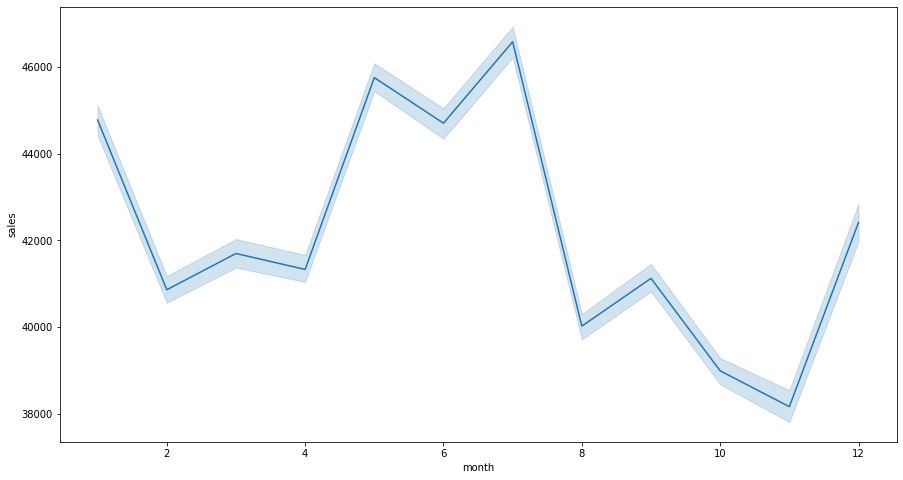

In [35]:
# let us see the sales over time
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y='sales', data=df_clean)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8f59c2a90>,
      dtype=object)

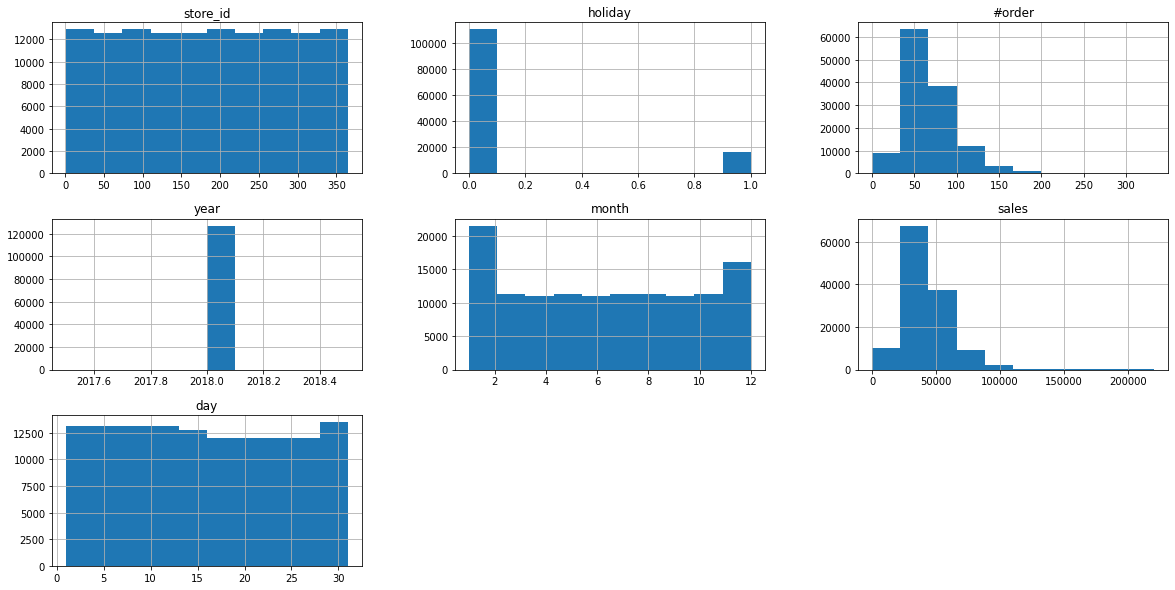

In [36]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

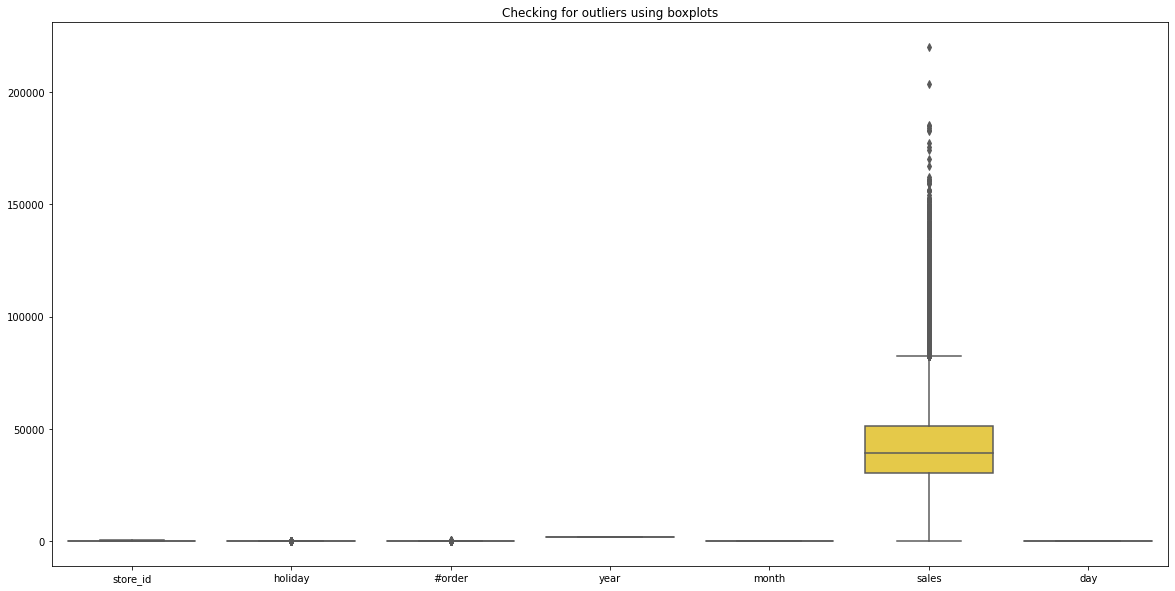

In [37]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns
# we only have outliers in the sales column

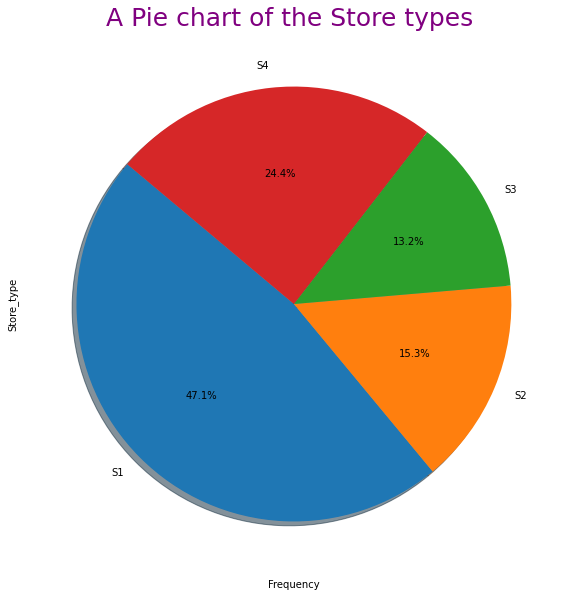

In [38]:
# let us plot a pie chart to show how the different store types contribute to our sales
store = df_clean.groupby(['store_type']).count().reset_index()

x = store['#order']
labels = store['store_type']
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.ylabel("Store_type")
plt.xlabel('Frequency')
plt.title("A Pie chart of the Store types ", color = 'purple', size =25)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# we can see that the hierachy of sales from the stores is S1, S4, S2, S3.

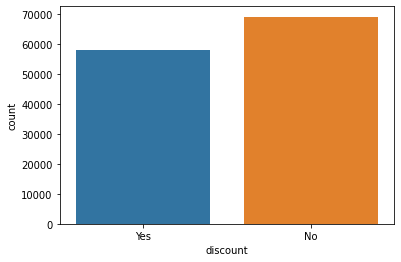

In [39]:
# let us visualize the discount column

sns.countplot(x="discount", data = df_clean)

# we can see that more sales are not discounted

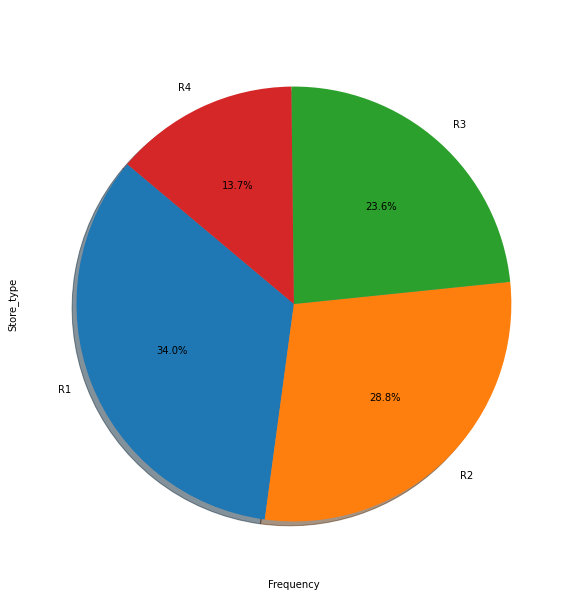

In [40]:
# let us plot a pie chart to show how the different region codes contribute to our sales
region = df_clean.groupby(['region_code']).count().reset_index()

x = region['#order']
labels = region['region_code']
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.ylabel("Store_type")
plt.xlabel('Frequency')
plt.title("A Pie chart of the region codes types ", color = 'White', size =25)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# we can see that the hierachy of sales from the stores is R1, R2, R3, R4.

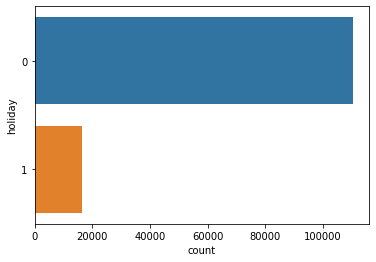

In [41]:
# let us visualize the holiday column
sns.countplot(y='holiday', data=df_clean)

# we can see that most sales were made on non-holiday days

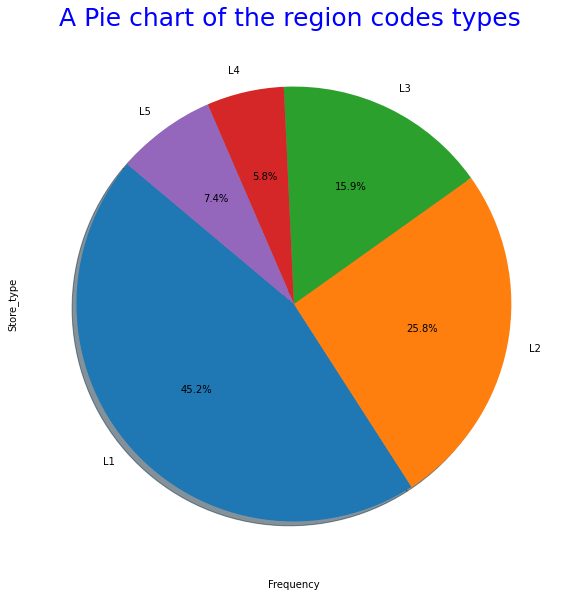

In [42]:
# let us plot a pie chart to show how the different location type contribute to our sales
location = df_clean.groupby(['location_type']).count().reset_index()

x = location['#order']
labels = location['location_type']
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.ylabel("Store_type")
plt.xlabel('Frequency')
plt.title("A Pie chart of the region codes types ", color = 'Blue', size =25)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# we can see that the hierachy of sales from the stores is L1, L2, L3, L5, L4

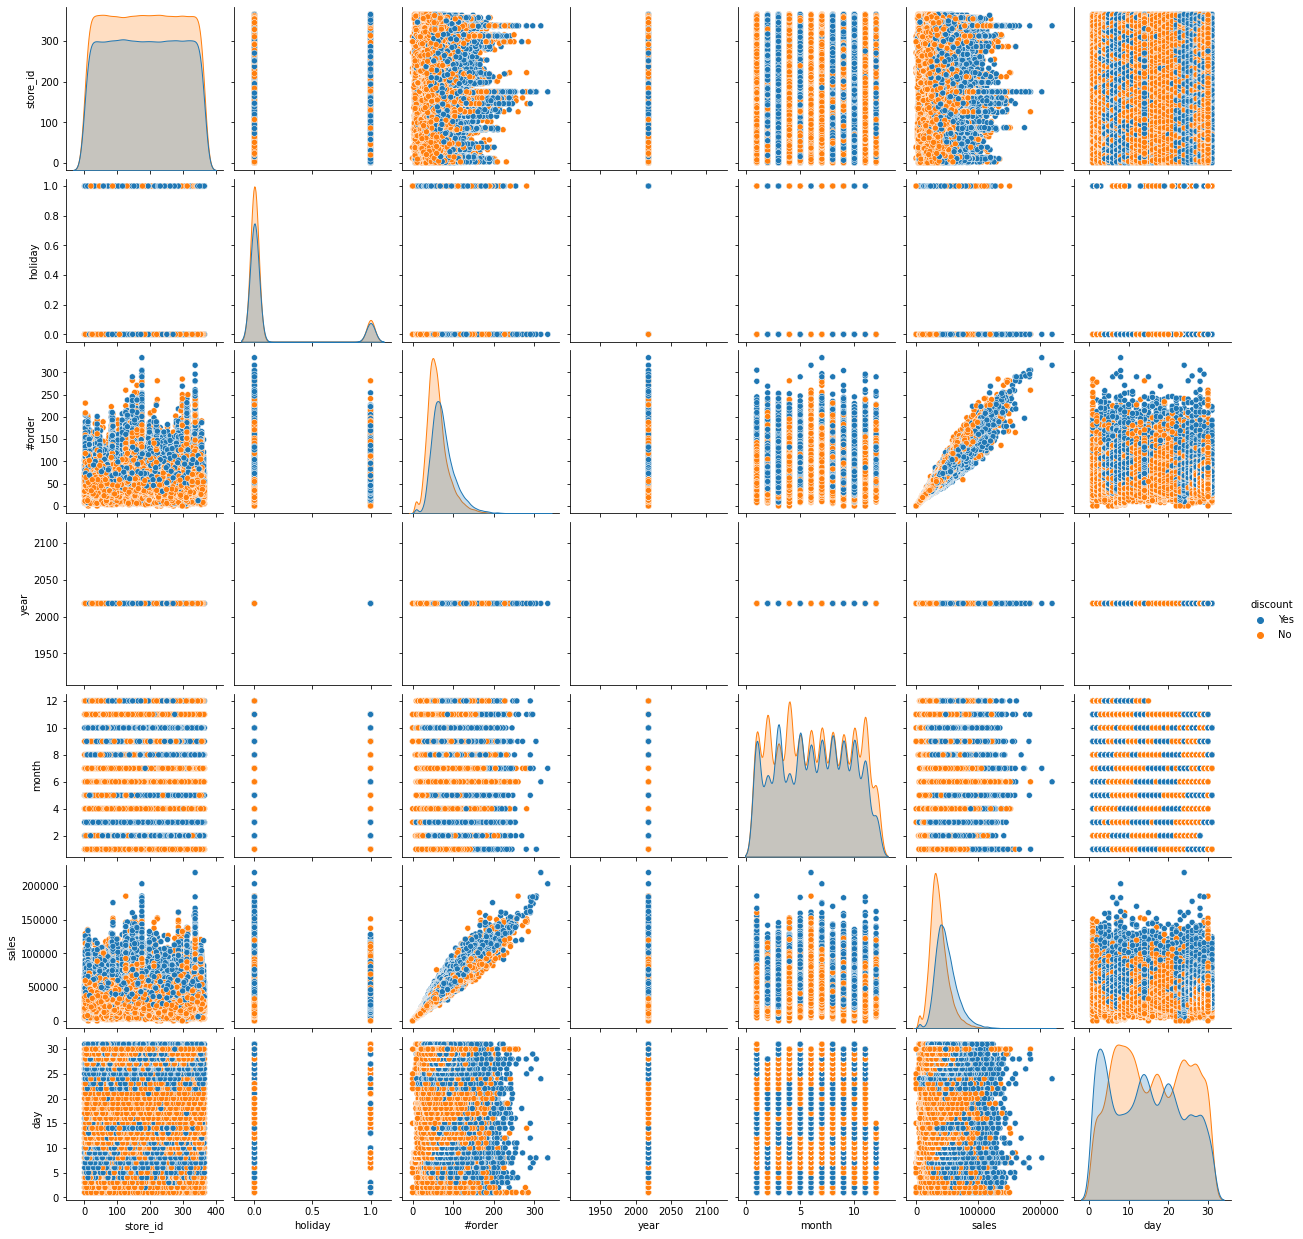

In [43]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean, hue="discount")
plt.show()

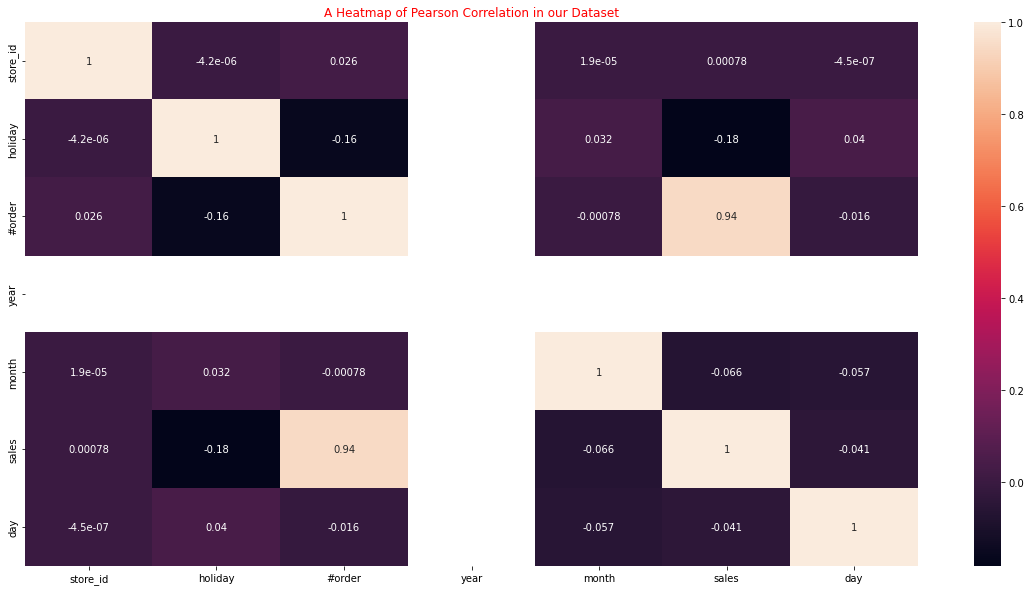

In [44]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# There is a high correlation between sales and orders

# Data Preprocessing

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127021 entries, 0 to 127020
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       127021 non-null  int64  
 1   store_type     127021 non-null  object 
 2   location_type  127021 non-null  object 
 3   region_code    127021 non-null  object 
 4   holiday        127021 non-null  int64  
 5   discount       127021 non-null  object 
 6   #order         127021 non-null  int64  
 7   year           127021 non-null  int64  
 8   month          127021 non-null  int64  
 9   sales          127021 non-null  float64
 10  day            127021 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 16.6+ MB


In [46]:
# it's time to transform all variables into numeric ones. 
# because machine learning models generally take numeric input
# Label Encoding
final_train = df_clean.copy(deep=True)
label_encode=LabelEncoder()
columns1=['store_type', 'location_type', 'region_code','discount']
final_train[columns1]=final_train[columns1].apply(label_encode.fit_transform)
final_train.head()

,store_id,store_type,location_type,region_code,holiday,discount,#order,year,month,sales,day
0,1,0,2,0,1,1,9,2018,1,7011.84,1
1,253,3,1,0,1,1,60,2018,1,51789.12,1
2,252,2,1,0,1,1,42,2018,1,36868.20,1
3,251,1,2,0,1,1,23,2018,1,19715.16,1
4,250,1,2,3,1,1,62,2018,1,45614.52,1


In [47]:
#Label Encoding for test data
final_test = test_copy.copy(deep=True)
label_encode=LabelEncoder()
columns1=['store_type', 'location_type', 'region_code','discount']
final_test[columns1]=final_test[columns1].apply(label_encode.fit_transform)
final_test.head()

,store_id,store_type,location_type,region_code,holiday,discount,year,month,day
0,171,3,1,2,0,0,2019,6,1
1,172,0,0,0,0,0,2019,6,1
2,173,3,1,0,0,0,2019,6,1
3,174,0,0,3,0,0,2019,6,1
4,170,0,0,1,0,0,2019,6,1


# Modeling Time

In [48]:
# Splitting features and target 
X = final_train.drop(columns=['sales', '#order'], axis=1)
Y = final_train['sales']

In [49]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### XGB 

In [50]:
#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# XGBoost Regressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = regressor.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)


# prediction on test data
test_data_prediction = regressor.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

[10:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared value =  0.6604357848588774
MSLE value =  88.21899093463908
R Squared value =  0.6559163782872758
MSLE value =  78.5911673403601


In [51]:
# let us make a submission file
### predict on the test data
test_predictions = regressor.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_xgbregressor.csv", index=False)

In [52]:
# Various hyper-parameters to tune for XGBoost
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  5.3min finished


0.8397828941936261
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [53]:
#let us apply best paramaters to our model and see if e can improve the score

# XGBoost Regressor
xgb = XGBRegressor(learning_rate= 0.07, 
              max_depth=7)

xgb.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = xgb.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)


# prediction on test data
test_data_prediction = xgb.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

[10:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared value =  0.7996157325402897
MSLE value =  53.424614078672974
R Squared value =  0.7862621407240498
MSLE value =  46.84846692305887


In [54]:
# let us make a submission file
### predict on the test data
test_predictions = xgb.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_xgb.csv", index=False)

### Random Forest


In [55]:
#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Random Forest Regressor
random = RandomForestRegressor(n_estimators = 10, random_state = 0)
random.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = random.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)

# prediction on test data
test_data_prediction = random.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

R Squared value =  0.9589099129716272
MSLE value =  17.924277645900855
R Squared value =  0.7649879228259698
MSLE value =  46.841525450739034


In [56]:
# let us make a submission file
### predict on the test data
test_predictions = random.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_random.csv", index=False)

In [57]:
# our random forest model is overfiting

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)
# Checking for the best parameters
#
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 229.0min finished


The best parameters are: {'n_estimators': 340, 'min_samples_split': 5, 'max_depth': 10}


In [65]:
# Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 340, 
                               min_samples_split = 5,
                               max_depth = 10)
forest.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = forest.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)

# prediction on test data
test_data_prediction = forest.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

R Squared value =  0.7433121232093827
MSLE value =  56.32278378923928
R Squared value =  0.7254493251873597
MSLE value =  51.74102409687421


In [66]:
# let us make a submission file
### predict on the test data
test_predictions = forest.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_forest.csv", index=False)

### GBR

In [60]:
#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# XGBoost Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = gbr.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)


# prediction on test data
test_data_prediction = gbr.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

R Squared value =  0.6608356423861318
MSLE value =  87.8038287588906
R Squared value =  0.6561829218336306
MSLE value =  78.23923661901135
R Squared value =  0.6608356423861318
MSLE value =  87.80382875889062
R Squared value =  0.6561829218336306
MSLE value =  78.23923661901136


In [61]:
# let us make a submission file
### predict on the test data
test_predictions = gbr.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_gbr.csv", index=False)

### KNR

In [62]:
#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# XGBoost Regressor
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)

# prediction on training data
training_data_prediction = knr.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
msle_train = metrics.mean_squared_log_error(Y_train, training_data_prediction)*1000
print('R Squared value = ', r2_train)
print('MSLE value = ', msle_train)


# prediction on test data
test_data_prediction = knr.predict(X_test)

# R squared Value for test set
r2_test = metrics.r2_score(Y_test, test_data_prediction)
msle_test = metrics.mean_squared_log_error(Y_test, test_data_prediction)*1000
print('R Squared value = ', r2_test)
print('MSLE value = ', msle_test)

R Squared value =  0.7035076080700176
MSLE value =  90.72740718413448
R Squared value =  0.531141482367521
MSLE value =  115.73591210078663


In [63]:
# let us make a submission file
### predict on the test data
test_predictions = knr.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Sales"] = test_predictions
# file
submission_df.to_csv("submission_knr.csv", index=False)